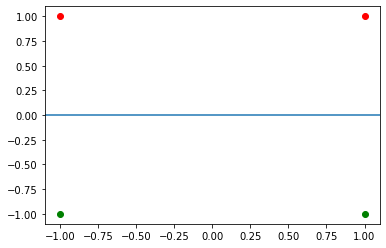

In [34]:
#Task 2

import math
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn import svm
import sklearn.metrics as sm

negative = np.array([[-1,1],[1,1]])
positive = np.array([[-1,-1],[1,-1]])

plt.scatter(positive[:,0], positive[:,1], color='green')
plt.scatter(negative[:,0], negative[:,1], color='red')
plt.axline((0,0), (1,0))
plt.show()


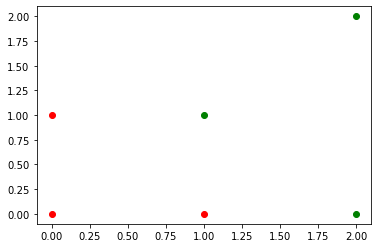

In [30]:
#Task 5

together = ([[1,1], [2,2], [2,0], [0,0], [1,0], [0,1]])

positive = np.array([[1,1], [2,2], [2,0]])
negative = np.array([[0,0], [1,0], [0,1]])

labels = np.array([1,1,1,-1,-1,-1])

plt.scatter(positive[:,0], positive[:,1], color='green')
plt.scatter(negative[:,0], negative[:,1], color='red')
plt.show()


In [31]:
#Task 7

import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from __future__ import division
import random
%matplotlib inline

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus

train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

train.rename(columns={'Sex':'Gender'}, inplace=True)
train.replace(to_replace=['male', 'female'], value=[0,1], inplace=True)

age_mean = int(train['Age'].mean())
age_std = int(train['Age'].std())

train['Age'] = train['Age'].fillna(random.randint(age_std, age_mean))


train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])
train['Embarked'].replace(to_replace=['C','Q','S'], value=[0,1,2], inplace=True)

train['Fare'] = train['Fare'].mask(train['Fare'] <= 7.91, 0)
train['Fare'] = train['Fare'].mask((train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 1)
train['Fare'] = train['Fare'].mask((train['Fare'] > 14.454) & (train['Fare'] <= 31.0), 2)
train['Fare'] = train['Fare'].mask((train['Fare'] > 31.0) & (train['Fare'] <= 513.329), 3).astype(int)

del train['Name']
del train['Cabin']
del train['Ticket']
del train['PassengerId']


cols = ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[cols]
Y = train.Survived

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

clf1 = svm.SVC(kernel='linear')
clf1.fit(X,Y)
score1 = cross_val_score(clf1, X, Y, cv=5)
print(score1)

clf2 = svm.SVC(kernel='poly')
clf2.fit(X,Y)
score2 = cross_val_score(clf2, X, Y, cv=5)
print(score2)

clf3 = svm.SVC(kernel='rbf')
clf3.fit(X,Y)
score3 = cross_val_score(clf3, X, Y, cv=5)
print(score3)

[0.80446927 0.80337079 0.78651685 0.75280899 0.78651685]
[0.64804469 0.65730337 0.66292135 0.65168539 0.6741573 ]
[0.65921788 0.66292135 0.63483146 0.64606742 0.64606742]
